In [70]:
# Imports
!pip install statsmodels==0.13.5
import csv
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

!pip install scikit-learn==1.2.2
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, auc

In [5]:
# Choosing the file for the model
from google.colab import files
uploaded = files.upload()

Saving ML_processed_job_postings_finale.csv to ML_processed_job_postings_finale.csv


In [50]:
finaldata = pd.read_csv('ML_processed_job_postings_finale.csv')
finaldata.head()

,job_id,title,work_type,description,min_salary,max_salary,normalized_salary,views,original_listed_time,expiry,...,company_size,country,headquarter state,headquarter city,headquarter addr,headquarter zipcode,industry,speciality,employee_count,follower_count
0,95428182,Administrative Coordinator,FULL_TIME,Job Title: Administrative CoordinatorOrganizat...,NaN,NaN,52000.0,1.0,4/11/2024 17:14,5/11/2024 17:14,...,NaN,US,Ohio,Cleveland,3635 PERKINS AVE,44114,Non-profit Organizations,NaN,6,289
1,266566927,Marketing & Office Coordinator,FULL_TIME,About Revesco Properties:Revesco Properties is...,55000.0,75000.0,65000.0,13.0,4/18/2024 16:49,5/18/2024 16:49,...,1.0,US,CO,Denver,2731 17th Street,80211,Real Estate,NaN,16,1880
2,266825034,Software Support Specialist,FULL_TIME,Are you driven by the thrill of solving proble...,60000.0,65000.0,62500.0,NaN,4/11/2024 18:22,10/8/2024 18:21,...,NaN,US,NY,New York City,0,0,Staffing and Recruiting,Recruitment,1,2
3,1014822088,Marketing Specialist,FULL_TIME,About TrackerTracker is a leading global cloud...,70000.0,80000.0,75000.0,7.0,4/18/2024 19:37,5/18/2024 19:37,...,2.0,US,California,San Diego,3830 Valley Centre Dr,92130,Software Development,"CRM (Customer Relationship Management), Softwa...",75,5046
4,1093227543,Sales Associate Natural Food Products,FULL_TIME,OVERVIEW:Poshi LLC (Poshi) is a healthy food c...,60000.0,120000.0,90000.0,71.0,4/17/2024 21:27,10/14/2024 21:27,...,NaN,US,FL,Miami,175 SW 7th Street,33130,Food and Beverage Services,NaN,15,751


In [51]:
columndrops = [0,1,2,3,4,5,7,8,9,10,11,12,14,15,16,17,27,28,29,30,31,32,33,34,35,36,37,38,39]
finaldata = finaldata.drop(finaldata.columns[columndrops], axis=1)
finaldata.head()

,normalized_salary,is_data_related,programming_languages_score,analysis_statistics_score,machine_learning_score,data_visualization_score,cloud_platform_score,database_score,big_data_tools_score,big_data_score,business_engineering_score
0,52000.0,True,1,1,0,0,2,0,0,0,0
1,65000.0,True,1,1,0,0,1,0,0,0,0
2,62500.0,True,3,1,0,0,0,0,0,0,0
3,75000.0,True,1,0,0,0,1,0,0,0,0
4,90000.0,True,1,2,0,0,0,0,0,0,0


In [52]:
processed_data = finaldata.copy()
processed_data.head()

,normalized_salary,is_data_related,programming_languages_score,analysis_statistics_score,machine_learning_score,data_visualization_score,cloud_platform_score,database_score,big_data_tools_score,big_data_score,business_engineering_score
0,52000.0,True,1,1,0,0,2,0,0,0,0
1,65000.0,True,1,1,0,0,1,0,0,0,0
2,62500.0,True,3,1,0,0,0,0,0,0,0
3,75000.0,True,1,0,0,0,1,0,0,0,0
4,90000.0,True,1,2,0,0,0,0,0,0,0


In [53]:
# Define features (X) and target (y)
X = processed_data.drop('normalized_salary', axis=1)  # Features
y = processed_data['normalized_salary']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Scale the features using StandardScaler (important for Lasso)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Create the Lasso model with an alpha value (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha

# Train the model on the training data
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [55]:
# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

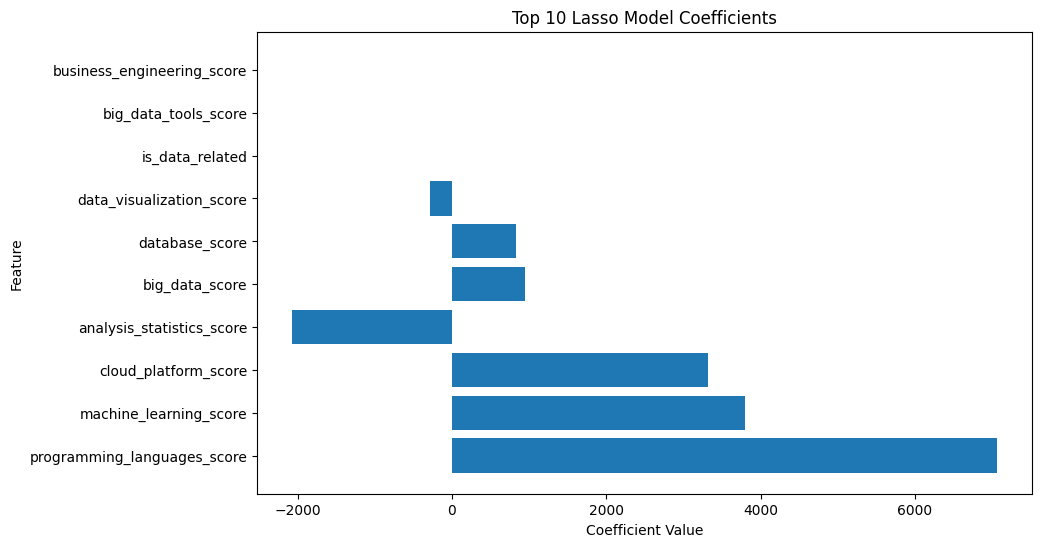

In [56]:
# Get the Lasso coefficients
coefficients = lasso_model.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort coefficients by magnitude for better visualization
top_10_coef = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)[:10]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_10_coef['Feature'], top_10_coef['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Lasso Model Coefficients')
plt.show()

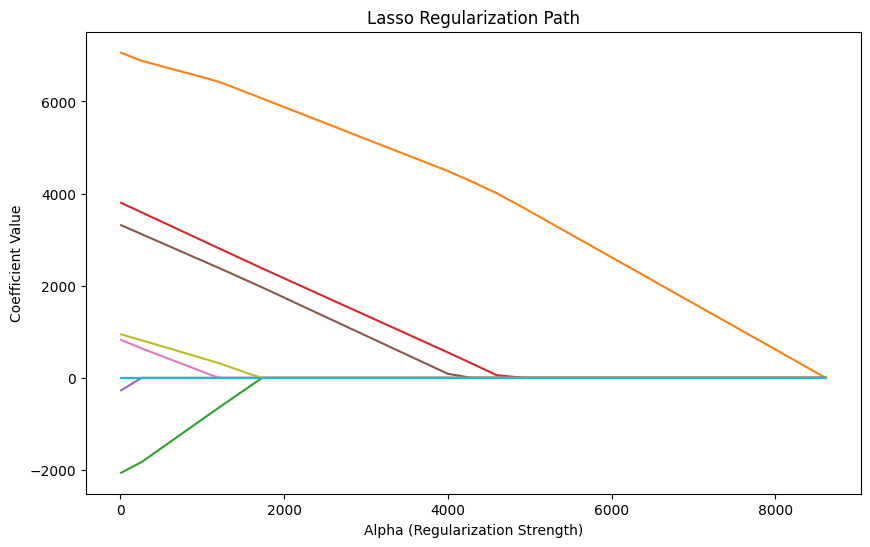

In [57]:
# Calculate the regularization path
alphas, coefs, _ = lasso_path(X_train, y_train)

# Plot the regularization path
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs.T)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regularization Path')
plt.show()

In [58]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(np.sqrt(mse))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print(np.sqrt(rmse))

2094113.487612225
1447.1052095864436


In [106]:
processed_data['salary_over_100k'] = (processed_data['normalized_salary'] > 100).astype(int)

In [91]:
X = processed_data.drop(['normalized_salary', 'salary_over_100k'], axis=1)  # Features (exclude the original salary and the new binary target)
y = processed_data['salary_over_100k']  # Target variable (the binary classification target)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

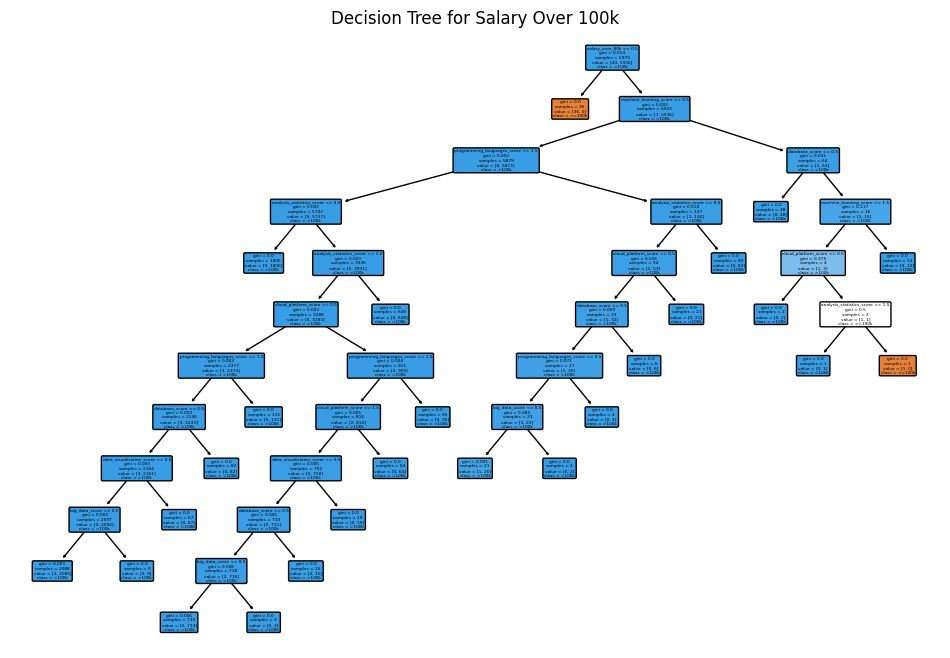

In [94]:
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=X.columns, filled=True, rounded=True, class_names=['<=100k', '>100k'])
plt.title("Decision Tree for Salary Over 100k")
plt.show()

In [95]:
y_pred = tree_classifier.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred, target_names=['<=100k', '>100k']))

              precision    recall  f1-score   support

      <=100k       1.00      0.69      0.82        59
       >100k       1.00      1.00      1.00      5920

    accuracy                           1.00      5979
   macro avg       1.00      0.85      0.91      5979
weighted avg       1.00      1.00      1.00      5979



In [97]:
print(confusion_matrix(y_test, y_pred))

[[  41   18]
 [   0 5920]]


In [98]:
y_probs = tree_classifier.predict_proba(X_test)

In [99]:
# For class '<=100k' (class 0)
fpr_class0, tpr_class0, thresholds_class0 = roc_curve(y_test, y_probs[:, 0], pos_label=0)
roc_auc_class0 = auc(fpr_class0, tpr_class0)

# For class '>100k' (class 1)
fpr_class1, tpr_class1, thresholds_class1 = roc_curve(y_test, y_probs[:, 1], pos_label=1)
roc_auc_class1 = auc(fpr_class1, tpr_class1)

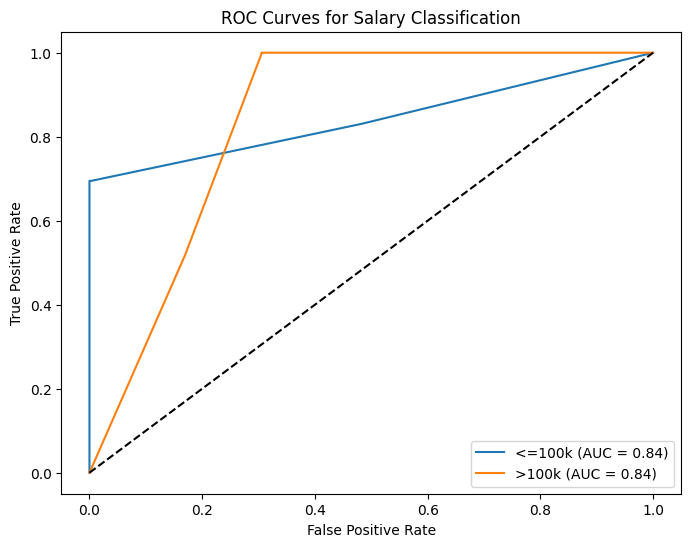

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_class0, tpr_class0, label=f'<=100k (AUC = {roc_auc_class0:.2f})')
plt.plot(fpr_class1, tpr_class1, label=f'>100k (AUC = {roc_auc_class1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Salary Classification')
plt.legend(loc='lower right')
plt.show()

In [104]:
root_node_feature_index = tree_classifier.tree_.feature[0:5]
root_node_feature_name = X.columns[root_node_feature_index]

print(f"The most important predictor (root node feature): {root_node_feature_name}")

The most important predictor (root node feature): Index(['salary_over_80k', 'business_engineering_score',
       'machine_learning_score', 'programming_languages_score',
       'analysis_statistics_score'],
      dtype='object')


In [108]:
# Assuming 'node_id' is the ID of the desired node
node_id = 0  # Example: Starting at the root node

feature_indices = []
while node_id != -1:  # -1 indicates a leaf node
    feature_indices.append(tree_classifier.tree_.feature[node_id])
    node_id = tree_classifier.tree_.children_left[node_id]  # Follow the left branch

# Get feature names from indices
feature_names = X.columns[feature_indices]

# Count occurrences of each feature to determine importance
feature_importance_branch = pd.Series(feature_names).value_counts()

print("Top Predictors in Branch:", feature_importance_branch)

Top Predictors in Branch: salary_over_80k               1
business_engineering_score    1
Name: count, dtype: int64


In [110]:
def get_top_predictors_in_branch(tree_classifier, X, node_id, branch_depth=3):
    """
    Gets the top predictors within a branch of a decision tree.

    Args:
        tree_classifier: The trained DecisionTreeClassifier object.
        X: The DataFrame containing the features.
        node_id: The ID of the starting node for the branch.
        branch_depth: The depth of the branch to analyze.

    Returns:
        A pandas Series containing the feature importance within the branch.
    """

    feature_indices = []
    current_depth = 0

    def traverse_branch(node_id, current_depth):
        if current_depth < branch_depth and node_id != -1:
            feature_indices.append(tree_classifier.tree_.feature[node_id])
            traverse_branch(tree_classifier.tree_.children_left[node_id], current_depth + 1)  # Left branch
            traverse_branch(tree_classifier.tree_.children_right[node_id], current_depth + 1)  # Right branch

    traverse_branch(node_id, current_depth)

    feature_names = X.columns[feature_indices]
    feature_importance_branch = pd.Series(feature_names).value_counts()

    return feature_importance_branch

# Analyze the first 3 branches (starting at the root node)
top_predictors_branch1 = get_top_predictors_in_branch(tree_classifier, X, node_id=0)
print("Top Predictors in Branch 1:", top_predictors_branch1)

Top Predictors in Branch 1: salary_over_80k                1
business_engineering_score     1
machine_learning_score         1
programming_languages_score    1
database_score                 1
Name: count, dtype: int64
